**Imports**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import json 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import copy

**Constants**

In [2]:
VHT_LINE_COST = 1000000 #Euros
HT_LINE_COST = 300000 #Euros
TRANSFORMER_COST = 500000 #Euros

VHT_VOLTAGE = 400000
HT_VOLTAGE = 90000

**Plants Data**

In [3]:
df_plants = pd.read_excel("plants_table.xlsx")
df_plants.index += 1
df_plants = pd.DataFrame(df_plants)
df_plants

,Plants,x,y,production (MW)
1,C1,300,100,900
2,C2,600,100,500
3,C3,700,200,1200
4,C4,900,700,450
5,C5,500,500,750
6,C6,400,900,1200


**Cities Data**

In [4]:
df_cities = pd.read_excel("cities_table.xlsx")
df_cities.index += 1
df_cities = pd.DataFrame(df_cities)
df_cities

,City,x,y,consumption (MW)
1,V1,150,100,200
2,V2,400,80,300
3,V3,950,70,200
4,V4,30,120,250
5,V5,600,300,300
6,V6,20,450,250
7,V7,300,500,300
8,V8,950,450,300
9,V9,70,800,250
10,V10,350,750,150


**Plant and City Network**

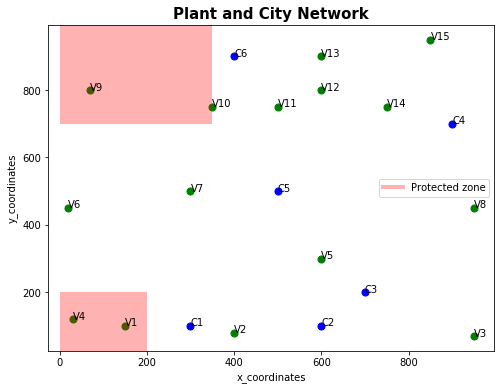

In [5]:
x_cityPoints, y_cityPoints, x_plantPoints, y_plantPoints= np.array(df_cities['x']), np.array(df_cities['y']), np.array(df_plants['x']), np.array(df_plants['y'])
cityAnnotations, plantAnnotations=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15'], ['C1','C2','C3','C4','C5','C6']
plt.figure(figsize=(8,6))
plt.scatter(x_cityPoints,y_cityPoints,s=50,color="green", label = "city")
plt.scatter(x_plantPoints,y_plantPoints,s=50,color="blue", label = "plant")
plt.xlabel("x_coordinates")
plt.ylabel("y_coordinates")
plt.legend(loc = "upper left")
custom_line = [Line2D([0],[0], color="red", lw = 4, alpha = 0.3)]
plt.legend(custom_line, ["Protected zone"], loc = "center right")
plt.title("Plant and City Network", weight = "bold",fontsize=15)
for i, label in enumerate(cityAnnotations):
    plt.annotate(label, (x_cityPoints[i], y_cityPoints[i]))
for i, label in enumerate(plantAnnotations):
    plt.annotate(label, (x_plantPoints[i], y_plantPoints[i]))
left, bottom, width, height = (0, 0, 200, 200)
protected_area_topcorner = mpatches.Rectangle((left,bottom), width, height, alpha = 0.3, facecolor = "red")
plt.gca().add_patch(protected_area_topcorner)
left, bottom, width, height = (0, 700, 350, 300)
protected_area_bottomcorner = mpatches.Rectangle((left,bottom), width, height, alpha = 0.3, facecolor = "red")
plt.gca().add_patch(protected_area_bottomcorner)

If one transformer per city entailed the minimum cost, we would have placed a transformer along a city's path from the nearest plant

In [6]:
closest_plants_info = []
for i in df_cities.index:
    shortest_distance = 99999
    closest_plant = (shortest_distance,"xx")
    for j in df_plants.index:
        euclidean_distance = np.sqrt(abs(df_cities["x"][i] - df_plants["x"][j])**2 + abs(df_cities["y"][i] - df_plants["y"][j])**2)
        if(euclidean_distance < shortest_distance):
            shortest_distance = euclidean_distance
            closest_plant = (shortest_distance,df_plants["Plants"][j])
    closest_plants_info.append(closest_plant)
closest_plants_info

[(150.0, 'C1'),
 (101.9803902718557, 'C1'),
 (281.7800560721074, 'C3'),
 (270.7397274136177, 'C1'),
 (141.4213562373095, 'C3'),
 (448.2186966202994, 'C1'),
 (200.0, 'C5'),
 (254.95097567963924, 'C4'),
 (344.81879299133334, 'C6'),
 (158.11388300841898, 'C6'),
 (180.27756377319946, 'C6'),
 (223.60679774997897, 'C6'),
 (200.0, 'C6'),
 (158.11388300841898, 'C4'),
 (254.95097567963924, 'C4')]

**Optimal Number of Clusters for Clustering of Cities**

Text(0.5, 1.0, 'KMeans Elbow Method for Cities Clustering')

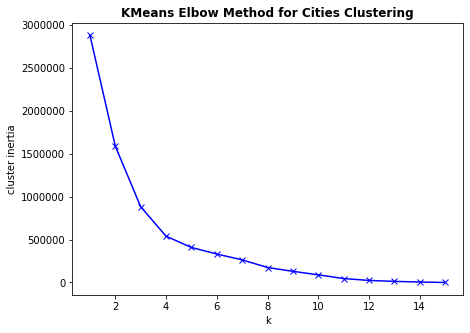

In [139]:
cluster_inertias = []
K = range(1, len(df_cities)+1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cities[["x","y"]])
    cluster_inertias.append(km.inertia_)
plt.figure(figsize=(7,5))
plt.plot(K, cluster_inertias, 'bx-')
plt.xlabel("k")
plt.ylabel("cluster inertia")
plt.title("KMeans Elbow Method for Cities Clustering", weight = "bold")

According to the elbow method, the optimal number of clusters to have would be 4. Lets impplement KMeans clustering where K = 4

**Clustering of Cities**

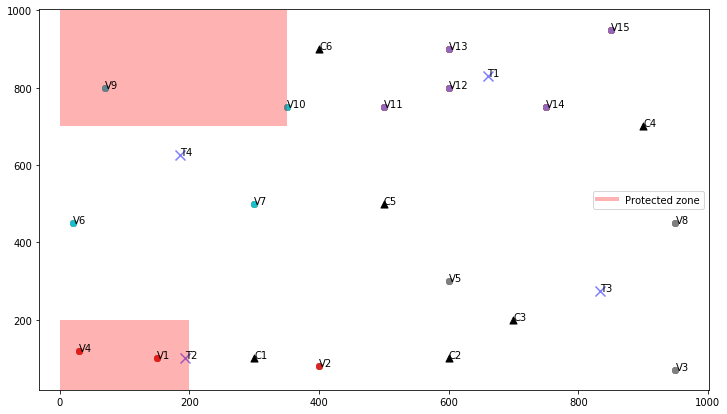

In [136]:
X = df_cities[["x","y"]].to_numpy()
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(df_cities[["x","y"]])
copy_label = copy.deepcopy(label)
plt.figure(figsize=(12,7))
for i in label:
    plt.scatter(X[label == i, 0], X[label == i, 1], label = i)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, alpha= 0.5, c = "blue", marker='x')
plt.scatter(x_plantPoints,y_plantPoints,s=50,color="black", label = "plant", marker="^")
left, bottom, width, height = (0, 0, 200, 200)
protected_area_topcorner = mpatches.Rectangle((left,bottom), width, height, alpha = 0.3, facecolor = "red")
plt.gca().add_patch(protected_area_topcorner)
left, bottom, width, height = (0, 700, 350, 300)
protected_area_bottomcorner = mpatches.Rectangle((left,bottom), width, height, alpha = 0.3, facecolor = "red")
plt.gca().add_patch(protected_area_bottomcorner)
plt.legend(custom_line, ["Protected zone"], loc = "center right")
for i, label in enumerate(cityAnnotations):
    plt.annotate(label, (x_cityPoints[i], y_cityPoints[i]))
transformerAnnotations = ["T1","T2","T3","T4"]
for i, label in enumerate(transformerAnnotations):
    plt.annotate(label, (kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1]))
for i, label in enumerate(plantAnnotations):
    plt.annotate(label, (x_plantPoints[i], y_plantPoints[i]))

**Optimal Number of Clusters for Clustering of Plants and Transforers**

In [160]:
x,y = [],[]
Y = df_plants[["x","y"]].to_numpy()
Y = Y.tolist()
for i in range(0,len(kmeans.cluster_centers_)):
    Y.append(kmeans.cluster_centers_[i].tolist())
for i in range(0,len(Y)):
    x.append(Y[i][0])
    y.append(Y[i][1])
df_temp = pd.DataFrame(columns=['x','y'])
df_temp['x'], df_temp['y'] = x, y
df_temp['x'] = df_temp['x'].astype(int)
df_temp['y'] = df_temp['y'].astype(int)
df_temp.index += 1
cluster_inertias = []
K = range(0,len(df_temp))
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Y)
#   cluster_inertias.append(km.inertia_)
#    plt.figure(figsize=(7,5))
#    plt.plot(K, cluster_inertias, 'bx-', color = "red")
#    plt.xlabel("k")
#    plt.ylabel("cluster inertia")
#    plt.title("KMeans Elbow Method for Plants and Transformers Clustering")

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:88: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: cannot convert float infinity to integer

**Clustering of Plants and Transformers**

In [91]:
#Y = df_plants[["x","y"]].to_numpy()
#Y = Y.tolist()
#for i in range(0,len(kmeans.cluster_centers_)):
#    Y.append(kmeans.cluster_centers_[i].tolist())


[[300, 100],
 [600, 100],
 [700, 200],
 [900, 700],
 [500, 500],
 [400, 900],
 [833.3333333333334, 273.33333333333337],
 [185.0, 625.0],
 [660.0, 830.0],
 [193.33333333333337, 100.0]]

**Closest Transformer Distances to Cities**

In [47]:
transformer_distances_tocities = []
for i in range(0,len(copy_label)):
    euclidean_distance = np.sqrt( abs(df_cities["x"][i+1] - kmeans.cluster_centers_[copy_label[i]][0])**2 + abs(df_cities["y"][i+1] - kmeans.cluster_centers_[copy_label[i]][1])**2)
    transformer_distances_tocities.append([euclidean_distance,df_cities["City"][i+1], f'T{copy_label[i]}', kmeans.cluster_centers_[copy_label[i]].tolist() ])
transformer_distances_tocities

[[43.33333333333337, 'V1', 'T3', [193.33333333333337, 100.0]],
 [207.63215336529913, 'V2', 'T3', [193.33333333333337, 100.0]],
 [234.42601296689656, 'V3', 'T0', [833.3333333333334, 273.33333333333337]],
 [164.5532672959665, 'V4', 'T3', [193.33333333333337, 100.0]],
 [234.85219938411385, 'V5', 'T0', [833.3333333333334, 273.33333333333337]],
 [240.52026941611388, 'V6', 'T1', [185.0, 625.0]],
 [169.85287751463028, 'V7', 'T1', [185.0, 625.0]],
 [211.7125934426722, 'V8', 'T0', [833.3333333333334, 273.33333333333337]],
 [209.40391591371923, 'V9', 'T1', [185.0, 625.0]],
 [207.0024154448445, 'V10', 'T1', [185.0, 625.0]],
 [178.88543819998318, 'V11', 'T2', [660.0, 830.0]],
 [67.08203932499369, 'V12', 'T2', [660.0, 830.0]],
 [92.19544457292888, 'V13', 'T2', [660.0, 830.0]],
 [120.41594578792295, 'V14', 'T2', [660.0, 830.0]],
 [224.72205054244233, 'V15', 'T2', [660.0, 830.0]]]

**Closest Plants to Transformers**

In [68]:
transformers_closest_plants = []
for i in range(0,len(transformerAnnotations)):
    shortest_distance = 999999
    closest_plant = "xx"
    for j in range(0, len(plantAnnotations)):   
        euclidean_distance = np.sqrt(abs(kmeans.cluster_centers_[i][0] - df_plants["x"][j+1])**2 + abs(kmeans.cluster_centers_[i][1] - df_plants["y"][j+1])**2)
        if(euclidean_distance < shortest_distance):
            shortest_distance = euclidean_distance
            closest_plant = df_plants["Plants"][j+1]
    transformers_closest_plants.append([f'for T{i+1}:',closest_plant, shortest_distance])
transformers_closest_plants

[['for T1:', 'C3', 152.16949614017776],
 ['for T2:', 'C5', 338.89526405661087],
 ['for T3:', 'C6', 269.2582403567252],
 ['for T4:', 'C1', 106.66666666666663]]

**Are Transformers in Protected Zone ?**

In [53]:
transformer_in_protected = []
transformer_information = []
for i in range(0,len(kmeans.cluster_centers_)):
    transformer_information.append([transformerAnnotations[i],kmeans.cluster_centers_[i].tolist()])
transformer_information
for transformer in transformer_information:
    if( ( transformer[1][0] >= 0 and transformer[1][0] <= 200 and transformer[1][1] >= 0 and transformer[1][1] <= 200 ) or (  transformer[1][0] >= 0 and transformer[1][0] <= 350 and transformer[1][1] >= 700 and transformer[1][1] <= 1000 ) ):
        transformer_in_protected.append([False,transformer[0]])
    else:
        transformer_in_protected.append([True,transformer[0]])
transformer_in_protected

[[True, 'T1'], [True, 'T2'], [True, 'T3'], [False, 'T4']]

**Are Cities in Protected Zone ?**

In [58]:
city_in_protected = []
for city in np.array(df_cities[["City","x","y"]]):
    if( (city[1] >= 0 and city[1] <= 200 and city[2] >= 0 and city[2] <= 200) or (city[1] >= 0 and city[1] <= 350 and city[2] >= 700 and city[2] <= 1000)):
        city_in_protected.append([False, city[0]])
    else:
        city_in_protected.append([True, city[0]])
city_in_protected

[[False, 'V1'],
 [True, 'V2'],
 [True, 'V3'],
 [False, 'V4'],
 [True, 'V5'],
 [True, 'V6'],
 [True, 'V7'],
 [True, 'V8'],
 [False, 'V9'],
 [False, 'V10'],
 [True, 'V11'],
 [True, 'V12'],
 [True, 'V13'],
 [True, 'V14'],
 [True, 'V15']]